In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables
print(diabetes_dataset.keys())
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis = 0))/targets.std()

In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1) 

In [6]:
print(train_data.shape, test_data.shape, train_targets.shape, test_targets.shape)

(397, 10) (45, 10) (397,) (45,)


#### Train a feedforward neural network model

In [7]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation = 'relu', input_shape = (train_data.shape[1],)),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(1)
    ])
    return model
# Instantiate model
model = get_model()

In [8]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [9]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 128) dtype=float32, numpy=
 array([[ 0.19794293, -0.04393658,  0.0953569 , ...,  0.2077155 ,
         -0.00313316,  0.13635303],
        [ 0.07402231, -0.17599294,  0.09891339, ...,  0.20188852,
         -0.14205205, -0.01588154],
        [ 0.18266053, -0.01012072, -0.11629916, ..., -0.13888997,
          0.08533148, -0.13061595],
        ...,
        [ 0.14777993,  0.0624444 , -0.1459864 , ..., -0.04025349,
          0.10631804, -0.1913945 ],
        [ 0.08048157,  0.07424448, -0.14196664, ...,  0.18590929,
         -0.05644147,  0.06756242],
        [ 0.04875492,  0.15695916,  0.04579143, ..., -0.1876342 ,
         -0.19534783, -0.17661402]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [10]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [11]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs = 200, validation_split = 0.15, batch_size = 64, verbose = 2)

Train on 337 samples, validate on 60 samples
Epoch 1/200
337/337 - 2s - loss: 1.0354 - mae: 0.8770 - val_loss: 0.7043 - val_mae: 0.7204
Epoch 2/200
337/337 - 0s - loss: 0.9483 - mae: 0.8389 - val_loss: 0.6059 - val_mae: 0.6718
Epoch 3/200
337/337 - 0s - loss: 0.7282 - mae: 0.7333 - val_loss: 0.5255 - val_mae: 0.5965
Epoch 4/200
337/337 - 0s - loss: 0.6013 - mae: 0.6267 - val_loss: 0.5431 - val_mae: 0.5869
Epoch 5/200
337/337 - 0s - loss: 0.5278 - mae: 0.5831 - val_loss: 0.6155 - val_mae: 0.6393
Epoch 6/200
337/337 - 0s - loss: 0.5210 - mae: 0.5858 - val_loss: 0.4787 - val_mae: 0.5333
Epoch 7/200
337/337 - 0s - loss: 0.5092 - mae: 0.5799 - val_loss: 0.5821 - val_mae: 0.6067
Epoch 8/200
337/337 - 0s - loss: 0.4918 - mae: 0.5635 - val_loss: 0.5129 - val_mae: 0.5523
Epoch 9/200
337/337 - 0s - loss: 0.4819 - mae: 0.5571 - val_loss: 0.4790 - val_mae: 0.5330
Epoch 10/200
337/337 - 0s - loss: 0.4665 - mae: 0.5497 - val_loss: 0.5274 - val_mae: 0.5706
Epoch 11/200
337/337 - 0s - loss: 0.4488 - m

In [12]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose = 2)

45/1 - 0s - loss: 0.8151 - mae: 0.6056


[0.652232649591234, 0.60556155]

#### Plot the learning curves

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

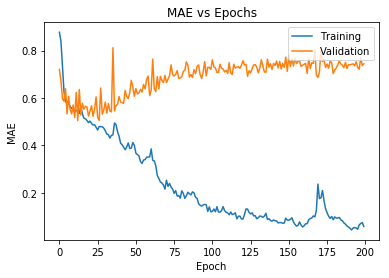

In [15]:
# Plot the training and validation mae

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.show()

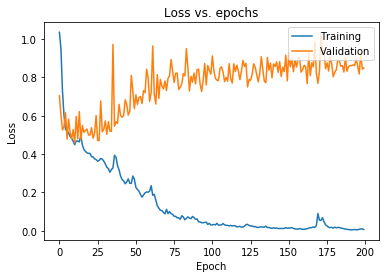

In [16]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [18]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.l2(wd),
              activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [19]:
# Re-build the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)

In [20]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [21]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs = 100, validation_split = 0.15, batch_size = 64, verbose = 2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 1.0514 - mae: 0.8808 - val_loss: 0.7424 - val_mae: 0.7351
Epoch 2/100
337/337 - 0s - loss: 1.0337 - mae: 0.8752 - val_loss: 0.7273 - val_mae: 0.7281
Epoch 3/100
337/337 - 0s - loss: 0.9893 - mae: 0.8596 - val_loss: 0.6740 - val_mae: 0.6969
Epoch 4/100
337/337 - 0s - loss: 0.8785 - mae: 0.8157 - val_loss: 0.5847 - val_mae: 0.6407
Epoch 5/100
337/337 - 0s - loss: 0.6949 - mae: 0.7113 - val_loss: 0.5126 - val_mae: 0.5761
Epoch 6/100
337/337 - 0s - loss: 0.6562 - mae: 0.6444 - val_loss: 0.5849 - val_mae: 0.6036
Epoch 7/100
337/337 - 0s - loss: 0.6610 - mae: 0.6539 - val_loss: 0.4986 - val_mae: 0.5693
Epoch 8/100
337/337 - 0s - loss: 0.6298 - mae: 0.6562 - val_loss: 0.5064 - val_mae: 0.5731
Epoch 9/100
337/337 - 0s - loss: 0.6389 - mae: 0.6667 - val_loss: 0.6398 - val_mae: 0.6589
Epoch 10/100
337/337 - 0s - loss: 0.6335 - mae: 0.6619 - val_loss: 0.4893 - val_mae: 0.5564
Epoch 11/100
337/337 - 0s - loss: 0.5820 - m

In [22]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose = 2)
# The loss is less as compared to unregularized model

45/1 - 0s - loss: 0.3361 - mae: 0.4807


[0.3384882105721368, 0.480749]

#### Plot the learning curves

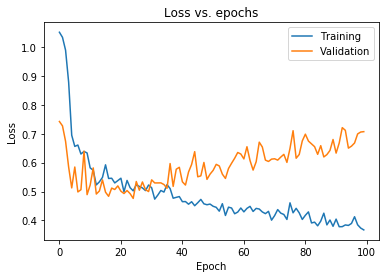

In [23]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [24]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs = None):
        print('Starting training...')
    def on_begin_epoch(self, epoch, logs = None):
        print(f"Starting Epoch {epoch}")
    def on_train_batch_begin(self, batch, logs = None):
        print(f"Starting Batch {batch}")
    def on_train_batch_end(self, batch, logs = None):
        print(f"Training: Finished batch {batch}")
    def on_epoch_end(self, epoch, logs = None):
        print(f"Finished epoch {epoch}")
    def on_train_end(self, logs = None):
        print("Finished Training!")

In [25]:
# Re-build the model

model = get_regularized_model(1e-5, 0.3)

In [26]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'mse')

#### Train the model with the callback

In [27]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs = 3, batch_size = 128, verbose = False, callbacks = [TrainingCallback()])

Starting training...
Starting Batch 0
Training: Finished batch 0
Starting Batch 1
Training: Finished batch 1
Starting Batch 2
Training: Finished batch 2
Starting Batch 3
Training: Finished batch 3
Finished epoch 0
Starting Batch 0
Training: Finished batch 0
Starting Batch 1
Training: Finished batch 1
Starting Batch 2
Training: Finished batch 2
Starting Batch 3
Training: Finished batch 3
Finished epoch 1
Starting Batch 0
Training: Finished batch 0
Starting Batch 1
Training: Finished batch 1
Starting Batch 2
Training: Finished batch 2
Starting Batch 3
Training: Finished batch 3
Finished epoch 2
Finished Training!


In [28]:
# Evaluate the model

class EvaluateCallback(Callback):

    def on_test_begin(self, logs = None):
        print("Starting Testing ...")
    def on_test_batch_begin(self, batch, logs = None):
        print(f"Testing: Started Batch {batch}")
    def on_test_batch_end(self, batch, logs = None):
        print(f"Finished Batch {batch}")
    def on_test_end(self, logs = None):
        print("Finished Testing!")

model.evaluate(test_data, test_targets, verbose = False,
               callbacks = [EvaluateCallback()])

Starting Testing ...
Testing: Started Batch 0
Finished Batch 0
Testing: Started Batch 1
Finished Batch 1
Finished Testing!


0.9063316173023648

In [29]:
# Make predictions with the model

class PredictCallback(Callback):

    def on_predict_begin(self, logs = None):
        print("Starting Predicting ...")
    def on_predict_batch_begin(self, batch, logs = None):
        print(f"Predicting: Started Batch {batch}")
    def on_predict_batch_end(self, batch, logs = None):
        print(f"Finished Batch {batch}")
    def on_predict_end(self, logs = None):
        print("Finished Predictions!")

model.predict(test_data, verbose = False, callbacks = [PredictCallback()])

Starting Predicting ...
Predicting: Started Batch 0
Finished Batch 0
Predicting: Started Batch 1
Finished Batch 1
Finished Predictions!


array([[ 7.8996949e-02],
       [-6.2434472e-02],
       [-6.6906005e-02],
       [-4.9428053e-02],
       [ 9.1145843e-02],
       [ 7.9787023e-02],
       [-5.7669524e-02],
       [ 4.9128026e-02],
       [ 2.1662194e-02],
       [-1.3821898e-04],
       [-6.0011506e-02],
       [ 5.2989297e-02],
       [ 6.9943555e-02],
       [-4.4036645e-02],
       [ 1.3201193e-02],
       [-2.9366195e-02],
       [-3.1333651e-02],
       [-6.8286493e-02],
       [-2.4901915e-02],
       [-4.8822917e-02],
       [ 1.3549665e-01],
       [ 2.5262337e-02],
       [ 1.1215409e-01],
       [-5.4619189e-02],
       [-6.7132160e-02],
       [-5.5913717e-02],
       [ 1.3918942e-01],
       [-5.7705116e-02],
       [-9.1053545e-03],
       [-4.2711508e-02],
       [-5.4745503e-02],
       [-4.4359121e-02],
       [ 4.5855597e-02],
       [-2.3787644e-02],
       [-3.6589496e-02],
       [ 1.5836291e-02],
       [ 7.2008856e-02],
       [ 8.4755935e-02],
       [ 9.8660327e-02],
       [ 1.1291980e-01],


***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [43]:
# Re-train the unregularised model

unregularized_model = get_model()
unregularized_model.compile(optimizer = 'adam', loss = 'mse')
unreg_history = unregularized_model.fit(train_data, train_targets, epochs = 100,
                                        validation_split = 0.15, batch_size = 64, verbose = False,
                                        callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2)])


In [44]:
# Evaluate the model on the test set

unregularized_model.evaluate(test_data, test_targets, verbose = 2)

45/1 - 0s - loss: 0.3963


0.34361061652501423

In [45]:
# Re-train the regularised model

regularized_model = get_regularized_model(1e-8, 0.2)
regularized_model.compile(optimizer = 'adam', loss = 'mse')
reg_history = regularized_model.fit(train_data, train_targets, epochs = 100,
                     validation_split = 0.15, batch_size = 64, verbose = False,
                     callbacks = [tf.keras.callbacks.EarlyStopping(patience = 2)])

In [46]:
# Evaluate the model on the test set

regularized_model.evaluate(test_data, test_targets, verbose = False)

0.3678139143519931

#### Plot the learning curves

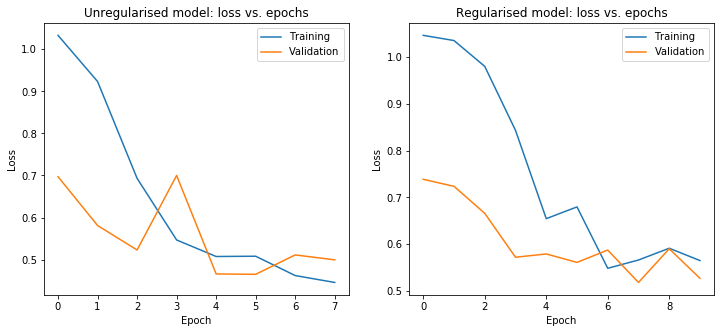

In [47]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()